# F1 Practice Session Notebook

## Key Links
- [Pandas Documentation](https://pandas.pydata.org/docs/getting_started/index.html)
- [Setups Explained](https://earlygame.com/gaming/f1-23-setups-explained)

## Notebook Setup

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/bahrain_myteam_fp2.csv', sep='\t')

# get max binIndex
maxBinIndex = df['binIndex'].max()
validLaps = df[df['binIndex'] == maxBinIndex][df['lap_time_invalid'] > -1].reset_index(drop=True)
sector1Bin = maxBinIndex / 3
sector2Bin = sector1Bin * 2

# camber map
frontCamberMap = {
    -0.0436332: -2.5, 
    -0.0523599: -3.0
}

rearCamberMap = {
    -0.0261799: -1.5,
    -0.0174533: -1.0,
}

# toe map
frontToeMap = {
    0.000872665: 0.05,
    0: 0
}

rearToeMap = {
    0.00436332: 0.25,
    0.00174533: 0.1
}

# Tyre Pressure Map
tyrePressureMap = {
    156511: 22.7,
    139964: 20.3,
    151685: 22.0,
    137895: 20.0,
}

# Visual Compound map
visualCompoundMap = {
    16: 'Soft',
    17: 'Medium',
    18: 'Hard',
    7: 'Intermediate',
    8: 'Wet',
}

# Actual Compound Map
actualCompoundMap = {
    16: 'C5',
    17: 'C4',
    18: 'C3',
    19: 'C2',
    20: 'C1',
    21: 'C0',
    7: 'inter',
    8: 'wet',
}


# Setup Headers
setupHeaders = [
    'lapNum',
    'Front Wing Setup', 
    'Rear Wing Setup', 
    'On Throttle Differential', 
    'Off Throttle Differential', 
    'Front Camber', 
    'Rear Camber', 
    'Front Toe', 
    'Rear Toe',
    'Front Suspension',
    'Rear Suspension',
    'Front Anti-Roll Bar',
    'Rear Anti-Roll Bar',
    'Front Ride Height',
    'Rear Ride Height',
    'Brake Pressure',
    'Brake Bias',
    'Front Left Tyre Pressure',
    'Front Right Tyre Pressure',
    'Rear Left Tyre Pressure',
    'Rear Right Tyre Pressure',
]

setupColumnRename = {
    'wing_setup_0': 'Front Wing Setup', 
    'wing_setup_1': 'Rear Wing Setup', 
    'susp_spring_setup_0': 'Front Suspension',
    'susp_spring_setup_2': 'Rear Suspension',
    'arb_setup_0': 'Front Anti-Roll Bar',
    'arb_setup_1': 'Rear Anti-Roll Bar',
    'susp_height_setup_0': 'Front Ride Height',
    'susp_height_setup_2': 'Rear Ride Height',
}

def highlight_min(x):
   min_val = x.min()
   return ['background-color: purple' if val == min_val else '' for val in x]

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
    

/var/folders/7v/5sz92nkn6s13fvy6c8bz7_sm0000gn/T/ipykernel_16675/2848754320.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  validLaps = df[df['binIndex'] == maxBinIndex][df['lap_time_invalid'] > -1].reset_index(drop=True)


## Lap Time Data
Lap times from valid laps 

In [70]:
validLaps['race_position'] = validLaps['race_position'].apply(lambda x: x + 1)
validLaps[['lapNum', 'lap_time', 'race_position']].style.apply(highlight_min, axis=0, subset=['lap_time'])


,lapNum,lap_time,race_position
0,1,96.420000,7
1,2,107.060000,7
2,3,96.877000,7
3,4,95.301000,16
4,5,97.048000,10
5,6,94.853000,10
6,7,94.636000,8
7,8,94.732000,8
8,9,96.508000,10
9,10,97.506000,10


## Sorted By Time


In [71]:
sortedLaps = validLaps.copy()
sortedLaps.sort_values(by=['lap_time'], inplace=True)
sortedLaps[['lapNum', 'lap_time', 'race_position']].style.apply(highlight_min, axis=0, subset=['lap_time'])

,lapNum,lap_time,race_position
6,7,94.636000,8
7,8,94.732000,8
5,6,94.853000,10
3,4,95.301000,16
0,1,96.420000,7
8,9,96.508000,10
2,3,96.877000,7
4,5,97.048000,10
9,10,97.506000,10
10,11,97.988000,11


## Summary Statistics

In [72]:
validLaps['lap_time'].describe()

count     13.000000
mean      97.332308
std        3.197906
min       94.636000
25%       95.301000
50%       96.877000
75%       97.988000
max      107.060000
Name: lap_time, dtype: float64

## Graphs

### Lap Time Distribution

Text(0, 97.43230769230769, 'average')

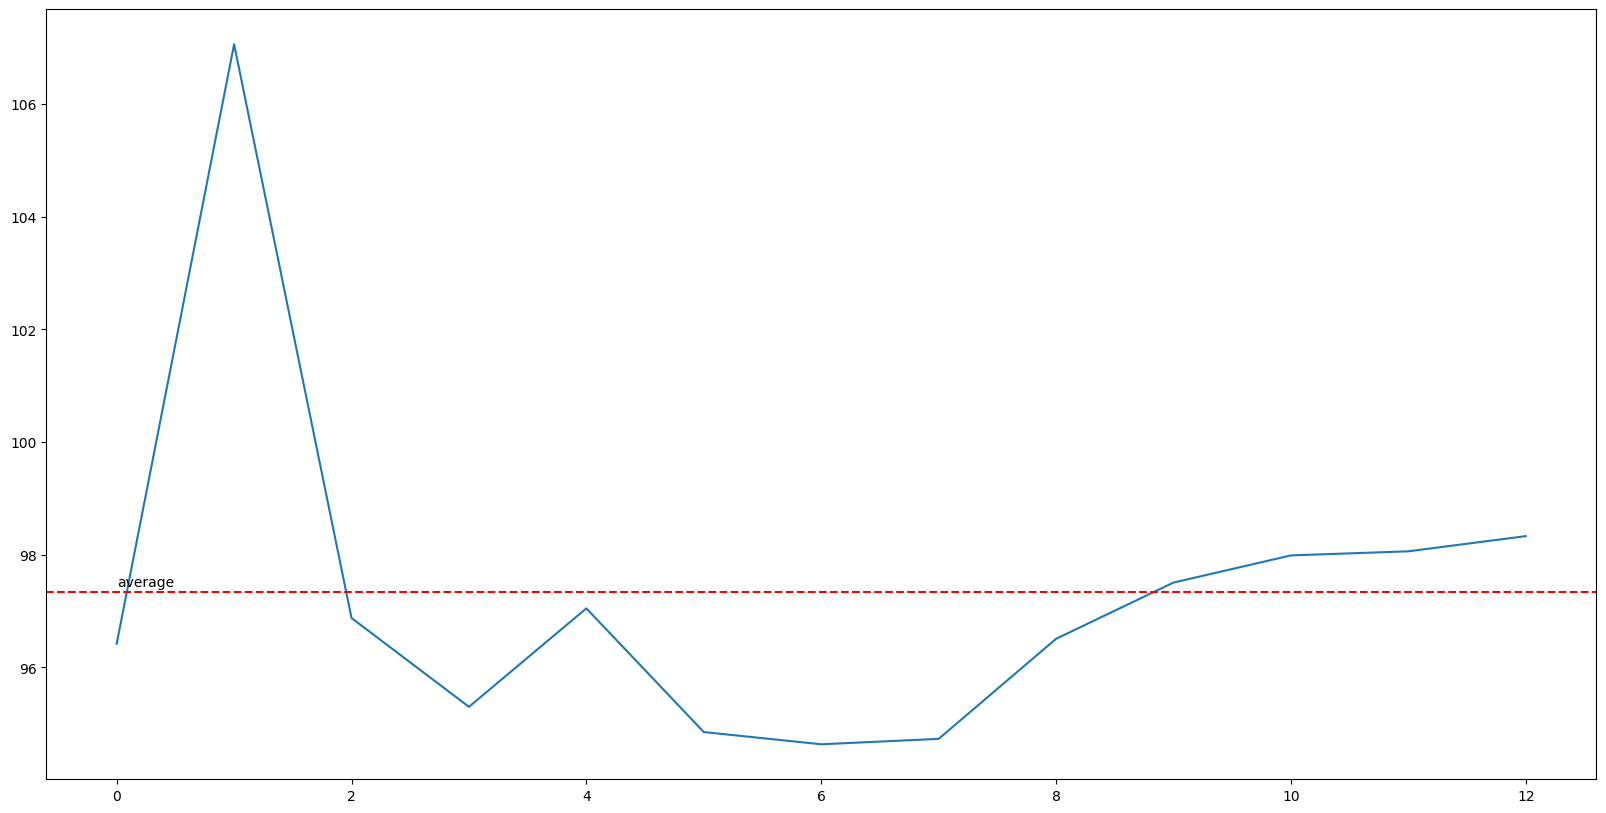

In [73]:
plot = validLaps['lap_time'].plot.line(figsize=(20, 10))
plot.axhline(y=validLaps['lap_time'].mean(), color='r', linestyle='--')
plot.annotate(text='average', xy=(0, validLaps['lap_time'].mean()), xytext=(0, validLaps['lap_time'].mean() + 0.1))

### Boxplot

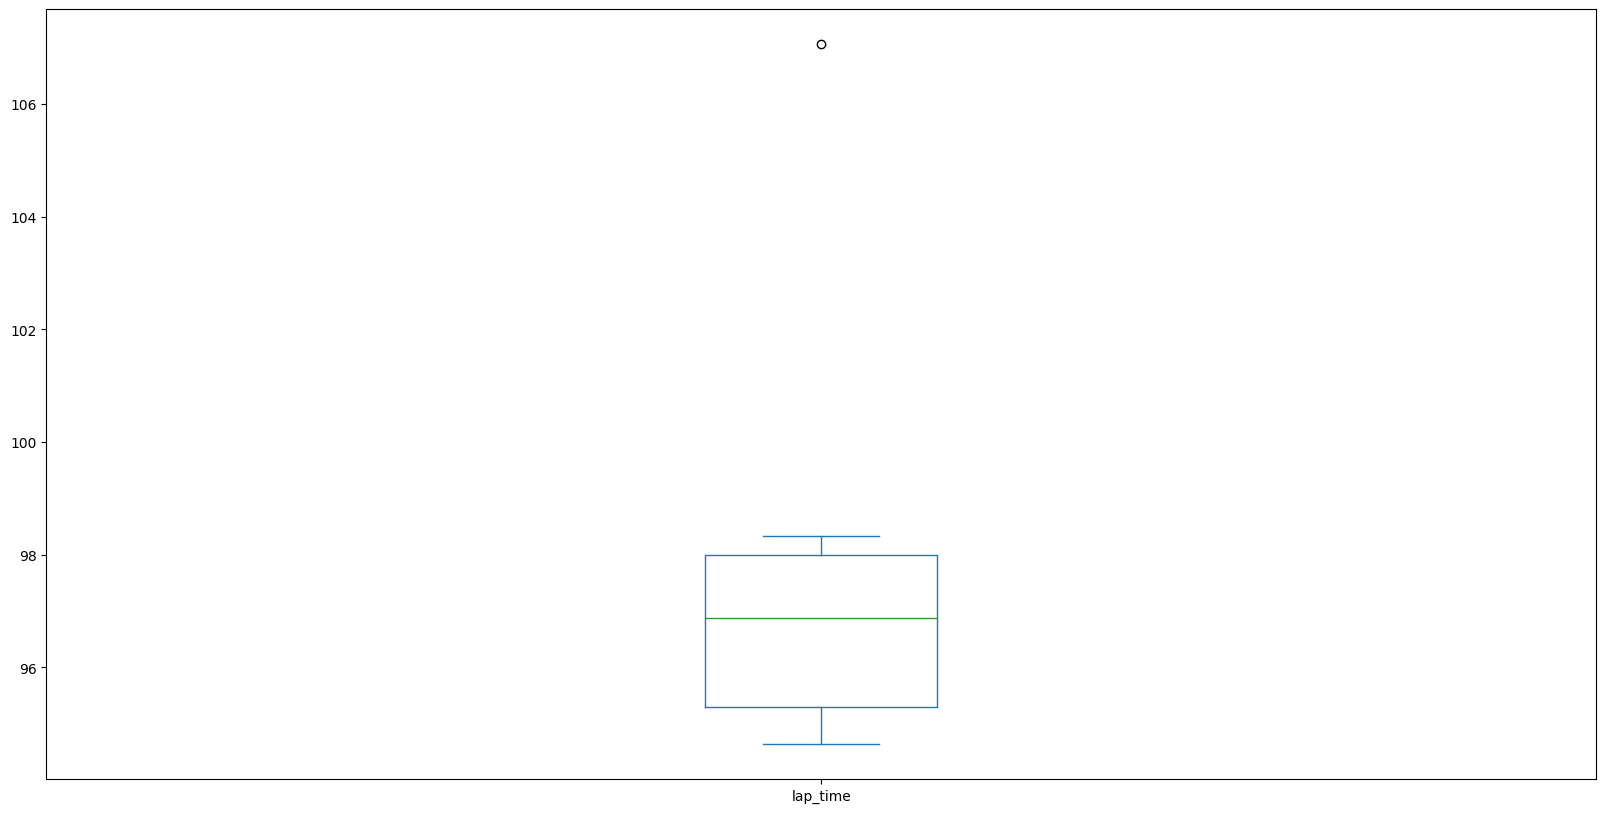

In [74]:
plot = validLaps['lap_time'].plot.box(figsize=(20, 10))

## Setup Data
Setup data from valid laps

In [81]:
setup_df = validLaps.rename(columns=setupColumnRename)
setup_df['On Throttle Differential'] = setup_df['diff_onThrottle_setup'] * 100
setup_df['Off Throttle Differential'] = setup_df['diff_offThrottle_setup'] * 100
setup_df['Front Camber'] = setup_df['camber_setup_0'].map(frontCamberMap)
setup_df['Rear Camber'] = setup_df['camber_setup_2'].map(rearCamberMap)
setup_df['Front Toe'] = setup_df['toe_setup_0'].map(frontToeMap)
setup_df['Rear Toe'] = setup_df['toe_setup_2'].map(rearToeMap)
setup_df['Brake Pressure'] = setup_df['brake_press_setup'] * 100
setup_df['Brake Bias'] = setup_df['brake_bias_setup'] * 100
setup_df['Front Left Tyre Pressure'] = setup_df['tyre_press_setup_0'].map(tyrePressureMap)
setup_df['Front Right Tyre Pressure'] = setup_df['tyre_press_setup_1'].map(tyrePressureMap)
setup_df['Rear Left Tyre Pressure'] = setup_df['tyre_press_setup_2'].map(tyrePressureMap)
setup_df['Rear Right Tyre Pressure'] = setup_df['tyre_press_setup_3'].map(tyrePressureMap)
setup_df[setupHeaders].transpose()

print(setup_df[setupHeaders])

# TODO combine lap setups based on similar setup values

AttributeError: 'DataFrame' object has no attribute 'unique'

## Fastest Lap Time Analysis

Tyre Compound: Hard C3


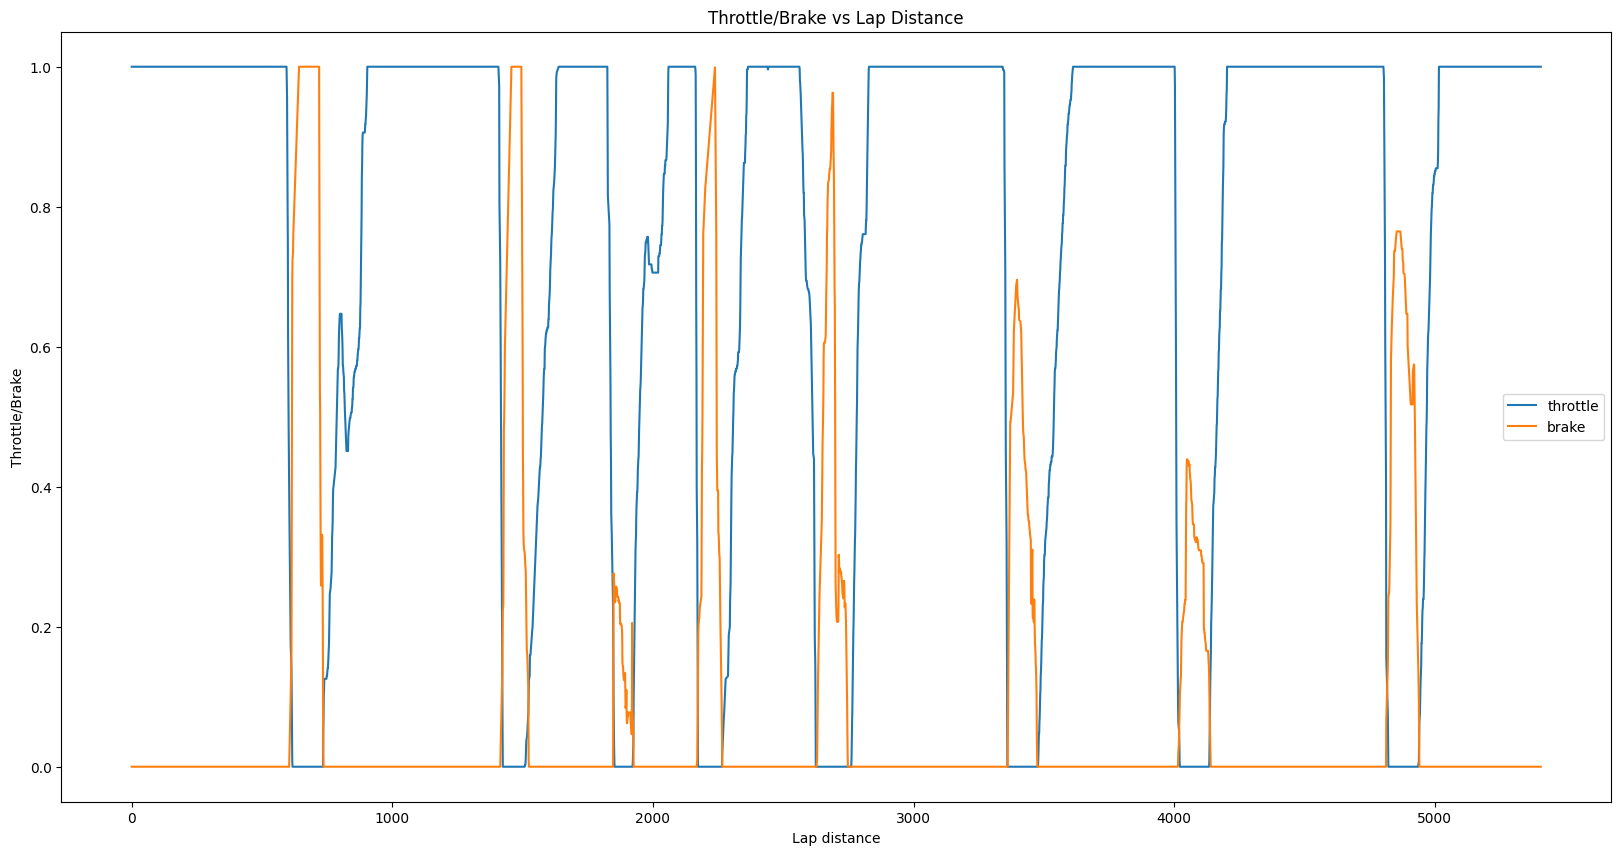

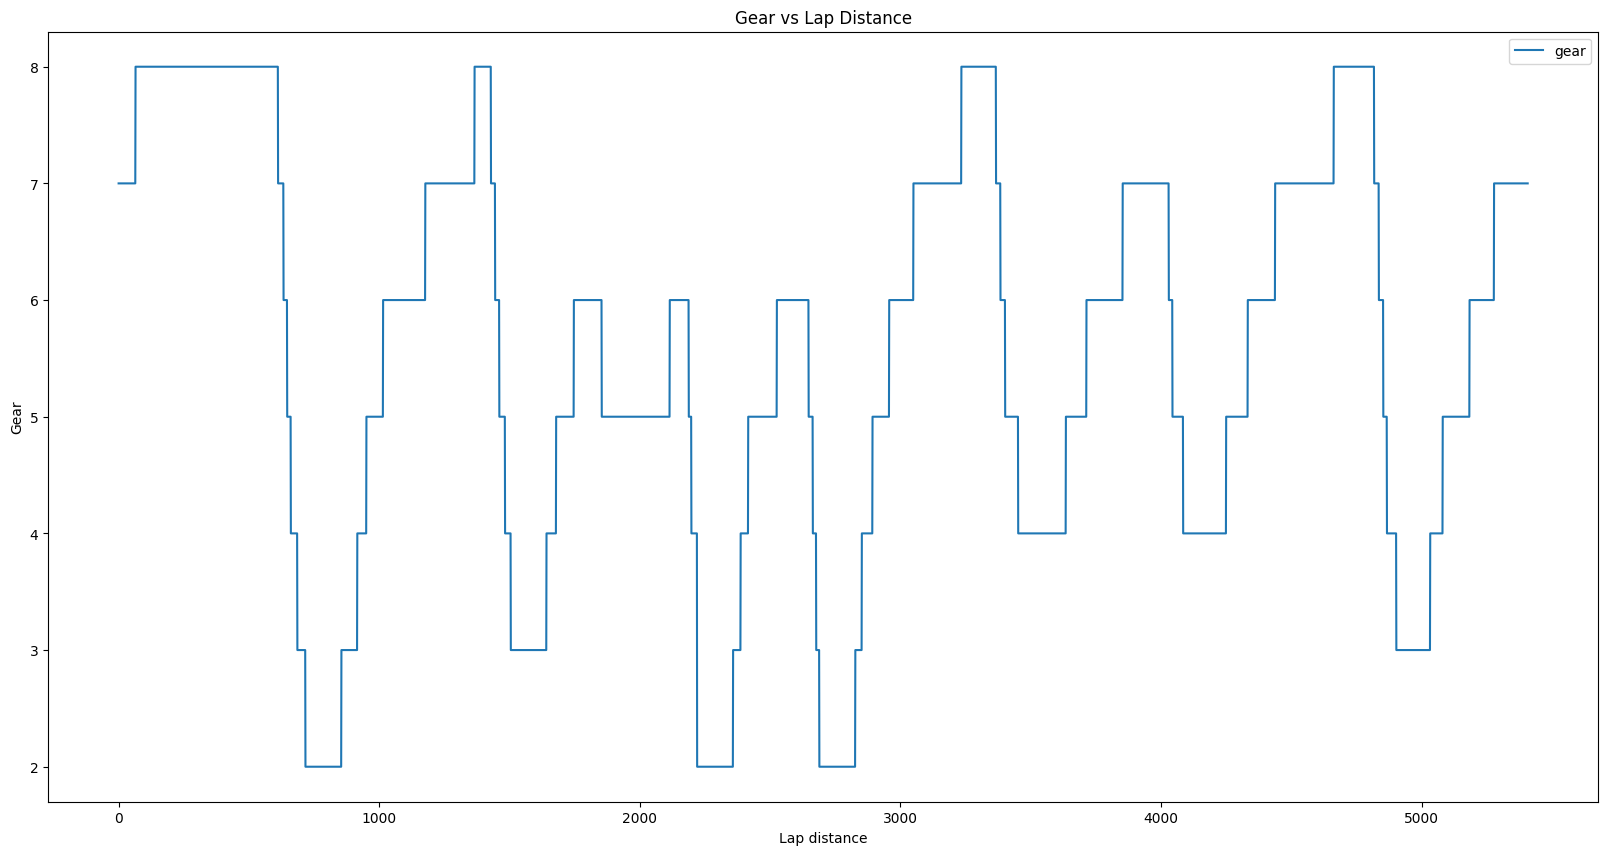

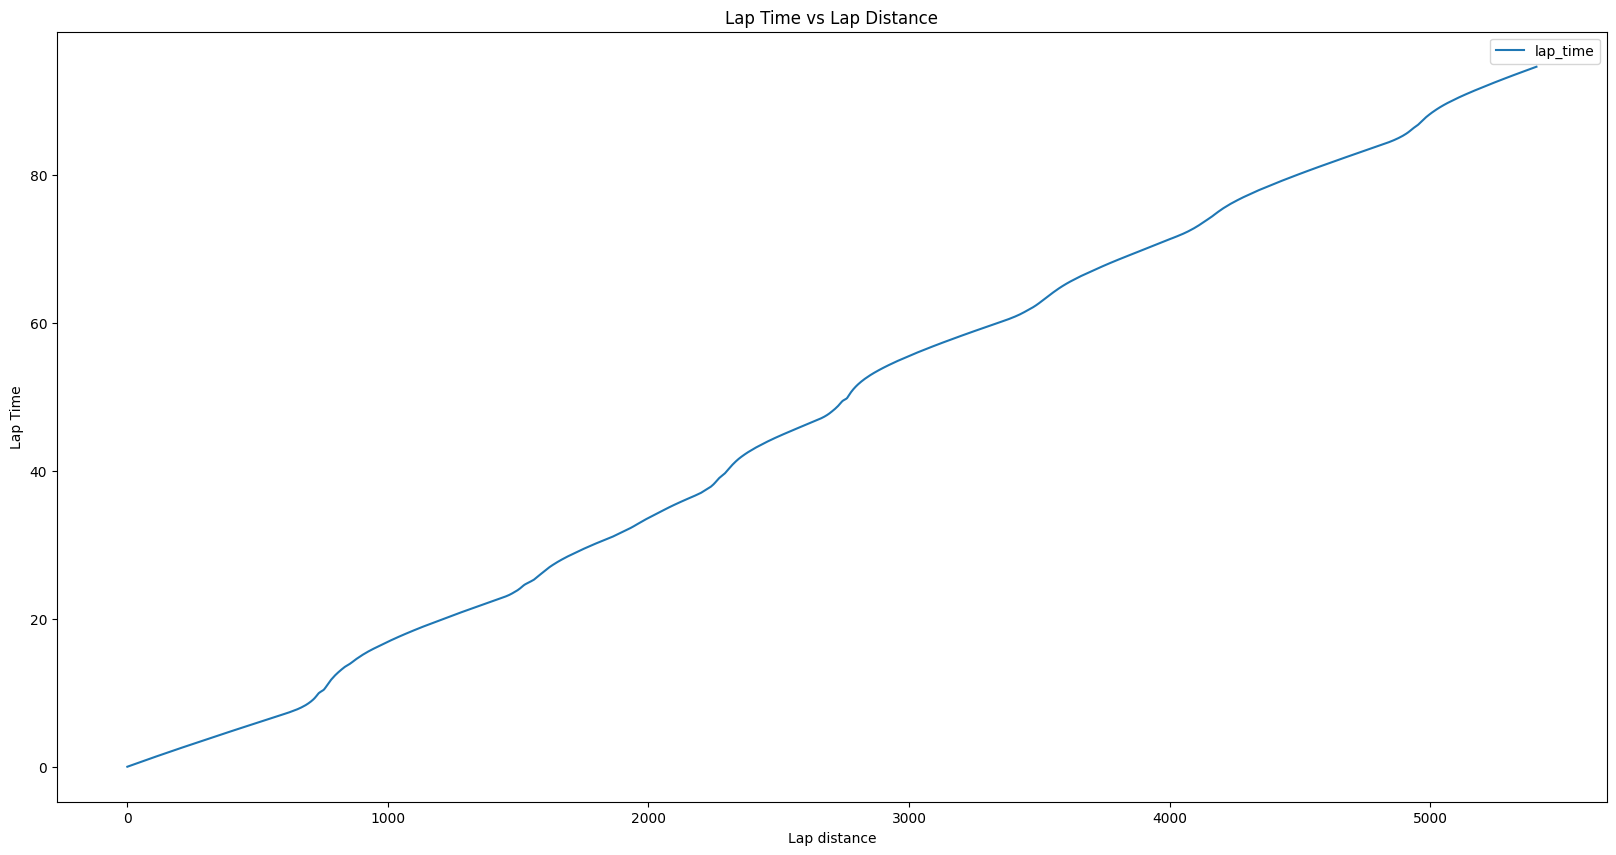

In [76]:
fastestLap = validLaps[validLaps['lap_time'] == validLaps['lap_time'].min()]['lapNum']
lap_data = df[df['lapNum'] == fastestLap.values[0]]

throttle_break = lap_data[['throttle', 'brake']].reset_index(drop=True)
gear_data = lap_data[['gear']].reset_index(drop=True)
lap_distance_time = lap_data[['lap_distance', 'lap_time']].reset_index(drop=True)

compound = df[df['lapNum'] == fastestLap.values[0]]['tyre_compound_0'].values[0]

print("Tyre Compound:", visualCompoundMap[compound], actualCompoundMap[compound])

throttle_break.plot(xlabel="Lap distance", ylabel="Throttle/Brake", title="Throttle/Brake vs Lap Distance", figsize=(20,10))
gear_data.plot(xlabel="Lap distance", ylabel="Gear", title="Gear vs Lap Distance", figsize=(20,10))
lap_distance_time.plot(xlabel="Lap distance", ylabel="Lap Time", title="Lap Time vs Lap Distance", figsize=(20,10), x="lap_distance", y="lap_time")

plt.show()

## Lap Comparison

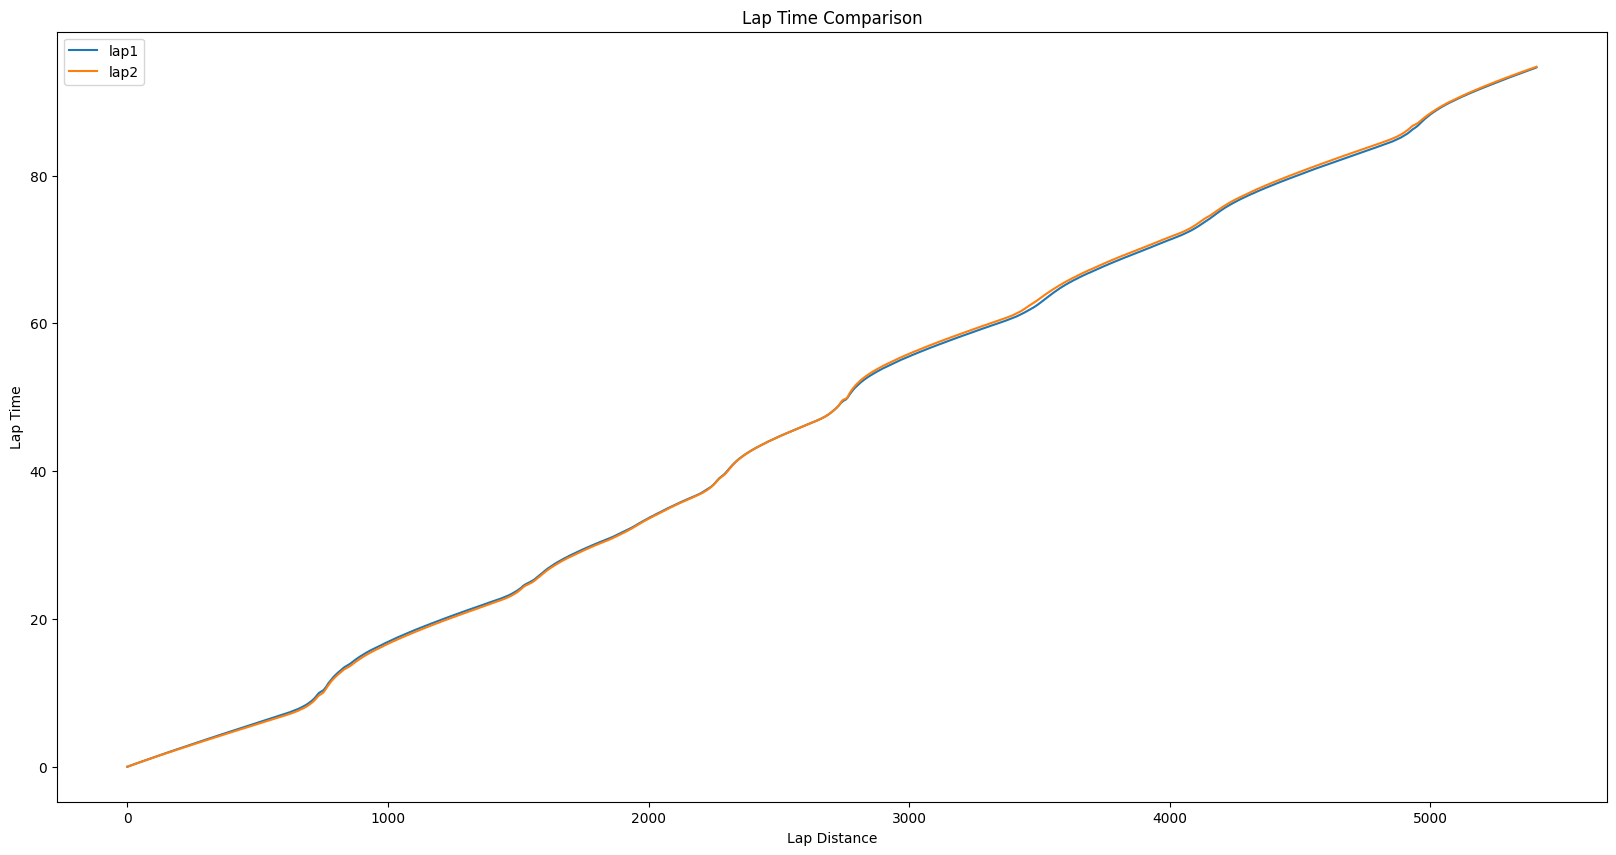

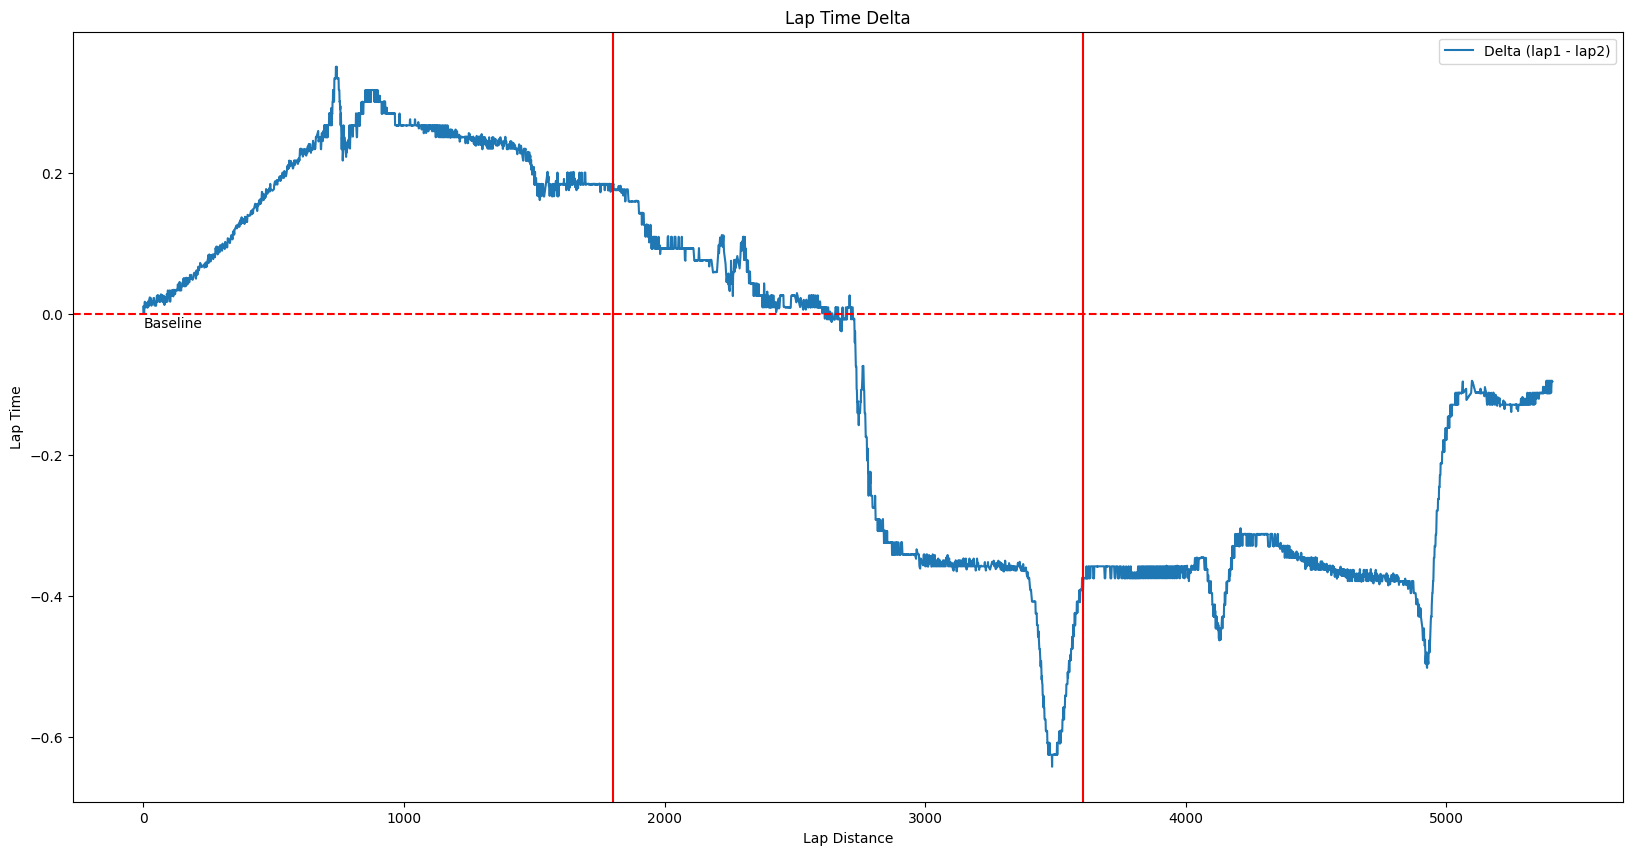

In [77]:
lap1 = 7
lap2 = 8

lap1_times = df[df['lapNum'] == lap1]['lap_time'].reset_index(drop=True)
lap2_times = df[df['lapNum'] == lap2]['lap_time'].reset_index(drop=True)

compare_df = pd.DataFrame({
    'lap1': lap1_times,
    'lap2': lap2_times
})

compare_df.plot(title="Lap Time Comparison", figsize=(20,10), xlabel="Lap Distance", ylabel="Lap Time")

compare_df['delta'] = compare_df['lap1'] - compare_df['lap2']
plot = compare_df.plot(title="Lap Time Delta", figsize=(20,10), xlabel="Lap Distance", ylabel="Lap Time", y="delta")
plot.axhline(y=0, color='r', linestyle='--')
plot.annotate('Baseline', xy=(0, 0), xytext=(0, -0.02))
plot.axvline(x=sector1Bin, color='r', linestyle='-', label='Sector 1')
plot.axvline(x=sector2Bin, color='r', linestyle='-')
plot.legend(['Delta (lap1 - lap2)'])

plt.show()

## Map

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


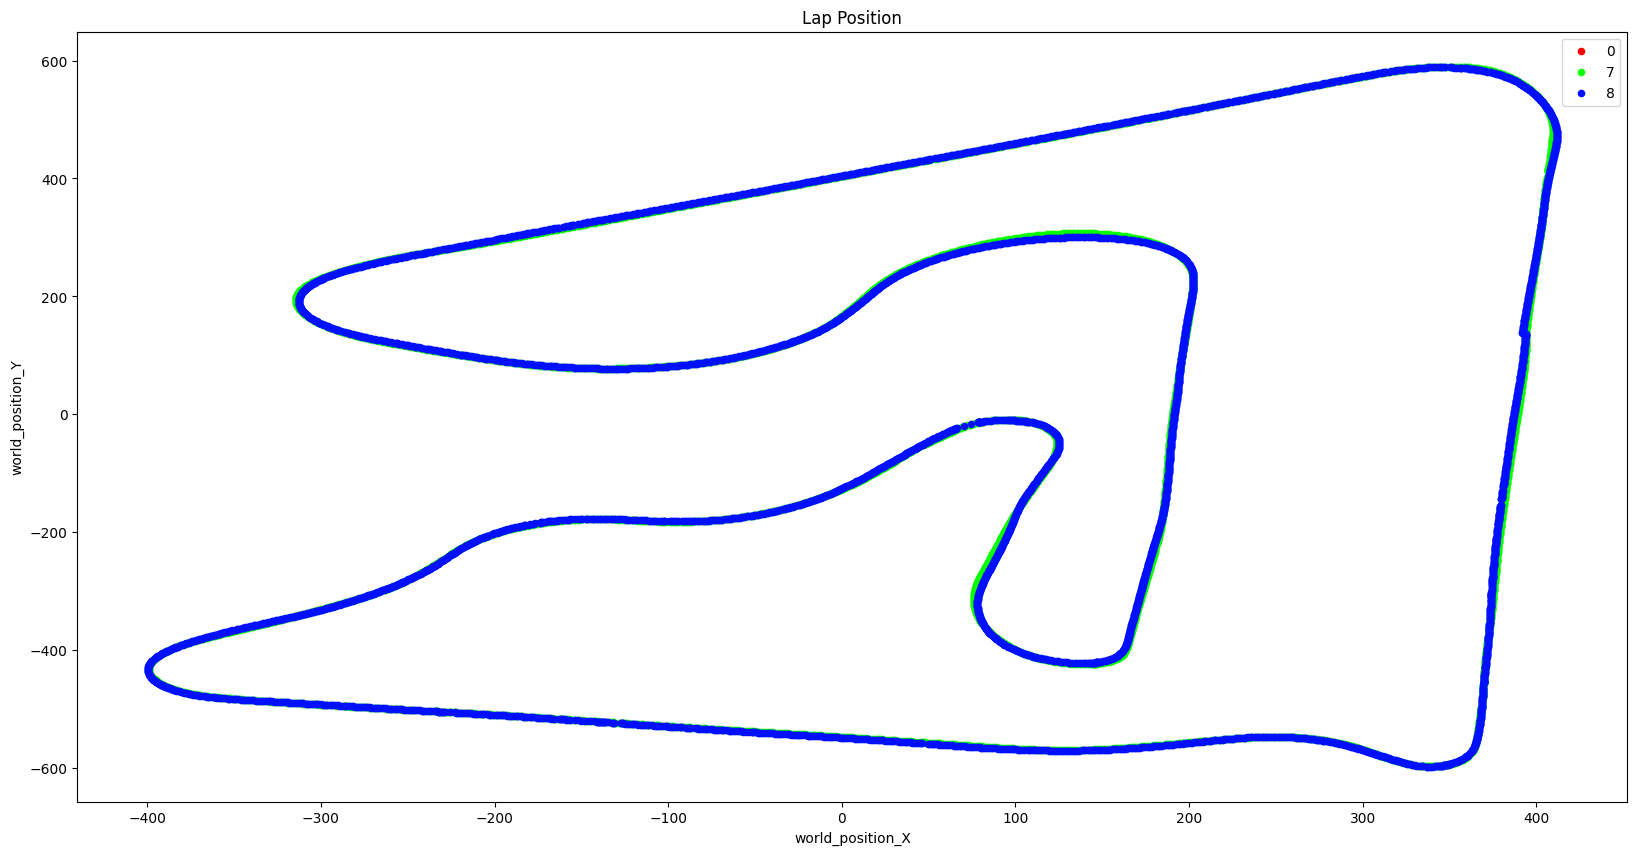

In [78]:
laps = [0, 7, 8]

lap_data = list(map(lambda lap: df[df['lapNum'] == lap][['world_position_X', 'world_position_Y']], laps))

colors = get_cmap(len(laps) + 1)

ax = lap_data[0].plot.scatter(x="world_position_X", y="world_position_Y", title="Lap Position", figsize=(20,10), xlabel="X", ylabel="Y", label=laps[0], color=colors(0))
for i in range(1, len(lap_data)):
    lap_data[i].plot.scatter(x="world_position_X", y="world_position_Y", ax=ax, label=laps[i], color=colors(i))

plt.show()

